In [63]:
import numpy as np
#import tensorflow_datasets as tfds
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224
BATCH_SIZE = 64

In [76]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Nithin R/Downloads/Dataset-3/train',labels='inferred',label_mode="int",class_names=['Mild','Proliferate_DR','Severe','No_DR','Moderate'],color_mode='rgb',batch_size=BATCH_SIZE,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=123,validation_split=0.2,subset='training')
ds_test=tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Nithin R/Downloads/Dataset-3/train',labels='inferred',label_mode="int",class_names=['Mild','Proliferate_DR','Severe','No_DR','Moderate'],color_mode='rgb',batch_size=BATCH_SIZE,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=123,validation_split=0.2,subset='validation')

Found 2390 files belonging to 5 classes.
Using 1912 files for training.
Found 2390 files belonging to 5 classes.
Using 478 files for validation.


In [77]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_train = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [81]:
(ds_train)

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, None, 5), dtype=tf.float32, name=None))>

In [82]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]


def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

In [83]:
def input_preprocess_train(image, label):
    image = img_augmentation(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


def input_preprocess_test(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(input_preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(batch_size=BATCH_SIZE, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size=BATCH_SIZE, drop_remainder=True)

ValueError: in user code:

    File "C:\Users\Nithin R\AppData\Local\Temp\ipykernel_21624\3477687113.py", line 2, in input_preprocess_train  *
        image = img_augmentation(image)
    File "C:\Users\Nithin R\AppData\Local\Temp\ipykernel_21624\2414918244.py", line 11, in img_augmentation  *
        images = layer(images)
    File "c:\Users\Nithin R\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'random_rotation_3' (type RandomRotation).
    
    Shape must be rank 4 but is rank 5 for '{{node random_rotation_3/transform/ImageProjectiveTransformV3}} = ImageProjectiveTransformV3[dtype=DT_FLOAT, fill_mode="REFLECT", interpolation="BILINEAR"](args_0, random_rotation_3/rotation_matrix/concat, random_rotation_3/transform/strided_slice, random_rotation_3/transform/fill_value)' with input shapes: [64,?,224,224,3], [64,8], [2], [].
    
    Call arguments received by layer 'random_rotation_3' (type RandomRotation):
      • inputs=tf.Tensor(shape=(64, None, 224, 224, 3), dtype=float32)
      • training=True


In [84]:
model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=5,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_5[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 3)          0         ['normalization_3

In [85]:
epochs = 20  # @param {type: "slider", min:10, max:100}
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test)

ValueError: Expected input data to be non-empty.

In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [4]:
import os
from sklearn.utils import shuffle

train_dir = 'C:/Users/Nithin R/Downloads/Dataset-3/train'
test_dir = 'C:/Users/Nithin R/Downloads/Dataset-3/test'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)  # Construct full label directory path
    for image in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image)  # Construct full image path
        if os.path.isfile(image_path):  # Check if it's a file before appending
            train_paths.append(image_path)
            train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)


(([<matplotlib.patches.Wedge at 0x20d7d078040>,
  [Text(0.5630095458255158, 0.973984215123298, 'Mild'),
   Text(-0.662590693592356, 0.909174665707751, 'Moderate'),
   Text(-0.8258831527721511, -0.7638992197712551, 'No_DR'),
   Text(0.7712128795068304, -0.8190578089993303, 'Proliferate_DR'),
   Text(1.1174915251172175, 0.12976012982112595, 'Severe')],
  [Text(0.3127830810141754, 0.5411023417351655, '16.7%'),
   Text(-0.3681059408846422, 0.505097036504306, '20.1%'),
   Text(-0.4588239737623061, -0.424388455428475, '33.6%'),
   Text(0.42845159972601676, -0.455032116110739, '16.7%'),
   Text(0.6208286250651207, 0.07208896101173662, '13.0%')]),)

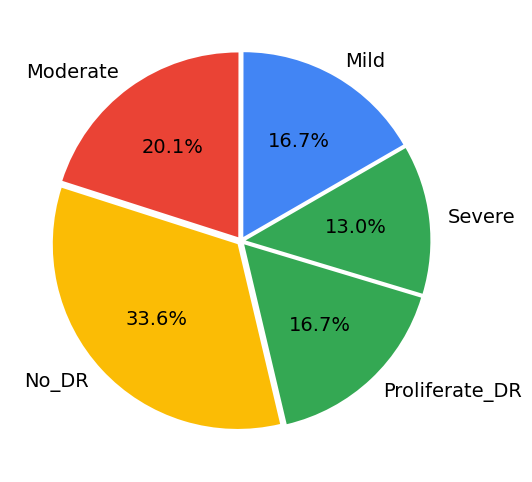

In [5]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05','#34a853','#34a855']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='Mild']),
         len([x for x in train_labels if x=='Moderate']),
         len([x for x in train_labels if x=='No_DR']),
         len([x for x in train_labels if x=='Proliferate_DR']),
         len([x for x in train_labels if x=='Severe'])],
        labels=['Mild','Moderate', 'No_DR','Proliferate_DR','Severe'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025,0.025),
        startangle=30),

In [6]:
test_dir = 'C:/Users/Nithin R/Downloads/Dataset-3/test'

test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)  # Construct full label directory path
    for image in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image)  # Construct full image path
        if os.path.isfile(image_path):  # Check if it's a file before appending
            test_paths.append(image_path)
            test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

(([<matplotlib.patches.Wedge at 0x20d7d13c760>,
  [Text(0.5128375981588028, 1.0013104403304254, 'Mild'),
   Text(-0.8485327569459855, 0.7386590285034396, 'Moderate'),
   Text(-0.5044311868923893, -1.0055715676620613, 'No_DR'),
   Text(0.9498688932380319, -0.6028051805175174, 'Proliferate_DR'),
   Text(1.106800386688664, 0.20153883999324812, 'Severe')],
  [Text(0.28490977675489043, 0.5562835779613473, '18.3%'),
   Text(-0.47140708719221414, 0.4103661269463553, '24.0%'),
   Text(-0.2802395482735496, -0.5586508709233673, '34.0%'),
   Text(0.5277049406877954, -0.3348917669541763, '12.8%'),
   Text(0.6148891037159243, 0.11196602221847117, '10.9%')]),)

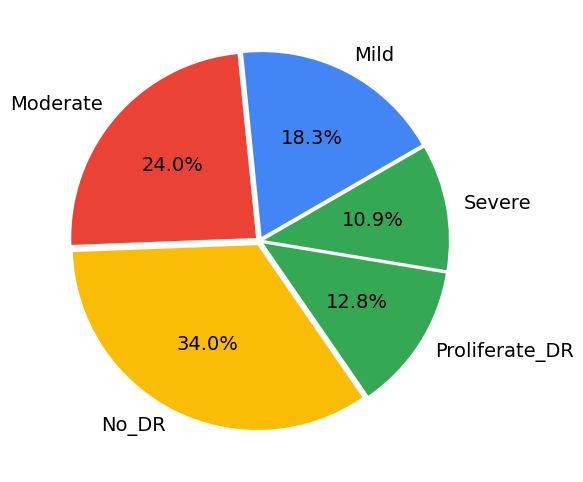

In [7]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05','#34a853','#34a855']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in test_labels if x=='Mild']),
         len([x for x in test_labels if x=='Moderate']),
         len([x for x in test_labels if x=='No_DR']),
         len([x for x in test_labels if x=='Proliferate_DR']),
         len([x for x in test_labels if x=='Severe'])],
        labels=['Mild','Moderate', 'No_DR','Proliferate_DR','Severe'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025,0.025),
        startangle=30),

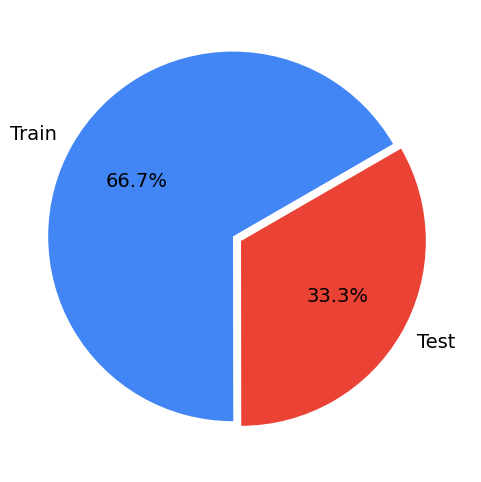

In [8]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0


In [10]:
train_data_dir = 'C:/Users/Nithin R/Downloads/Dataset-3/train'
validation_data_dir = 'C:/Users/Nithin R/Downloads/Dataset-3/test'

In [11]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 10
num_classes = 5  # Number of classes for Diabetic Retinopathy detection

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Only rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 3003 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [12]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [14]:
model = Model(inputs=base_model.input, outputs=predictions)


In [15]:
for layer in base_model.layers:
    layer.trainable = False


In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
93/93 [==============================] - 238s 2s/step - loss: 1.5682 - accuracy: 0.3312 - val_loss: 1.5421 - val_accuracy: 0.3424
Epoch 2/10
93/93 [==============================] - 203s 2s/step - loss: 1.5592 - accuracy: 0.3356 - val_loss: 1.5398 - val_accuracy: 0.3370
Epoch 3/10
93/93 [==============================] - 199s 2s/step - loss: 1.5682 - accuracy: 0.3241 - val_loss: 1.5412 - val_accuracy: 0.3356
Epoch 4/10
93/93 [==============================] - 216s 2s/step - loss: 1.5635 - accuracy: 0.3356 - val_loss: 1.5420 - val_accuracy: 0.3417
Epoch 5/10
93/93 [==============================] - 232s 2s/step - loss: 1.5615 - accuracy: 0.3366 - val_loss: 1.5357 - val_accuracy: 0.3417
Epoch 6/10
93/93 [==============================] - 328s 4s/step - loss: 1.5562 - accuracy: 0.3359 - val_loss: 1.5511 - val_accuracy: 0.3404
Epoch 7/10
93/93 [==============================] - 323s 3s/step - loss: 1.5612 - accuracy: 0.3366 - val_loss: 1.5475 - val_accuracy: 0.3376
Epoch 8/10
93

In [19]:
model.save('efficientnetb0.h5')

c:\Users\Nithin R\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('efficientnetb0.h5')

In [25]:
img_path = 'C:/Users/Nithin R/Downloads/Dataset-3/train/Severe/fcc6aa6755e6.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Preprocess the image
img_array /= 255.  # Rescale pixel values

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
labels = ['No_DR', 'mild', 'moderate', 'severe', 'proliferative_DR']
predicted_label = labels[np.argmax(predictions)]
print(predictions)

print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 77ms/step
[[0.20526886 0.1557521  0.3781548  0.13389586 0.12692842]]
Predicted class: moderate
